<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/A17_RandomForest_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


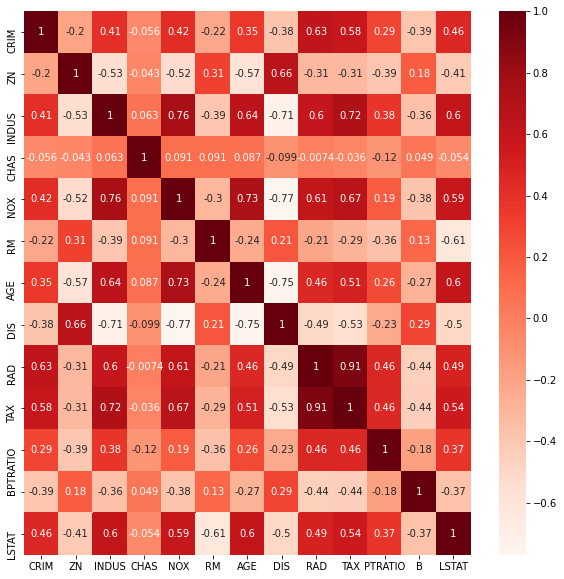

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns=['target']).corr(method='pearson'), annot=True, cmap = 'Reds')
plt.show()

we have TAX and RAD highly correlated to each other.\
we will first build normal model..\
then we will tweak it..

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

d_reg = DecisionTreeRegressor()
d_reg.fit(x_train, y_train)
print('Results using Decision Tree Regressor')
print(f'train score : {d_reg.score(x_train, y_train)} ')
print(f'test score  : { d_reg.score(x_test, y_test)}')

Results using Decision Tree Regressor
train score : 1.0 
test score  : 0.6850930253633074


In [ ]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor(random_state = 6)
r_reg.fit(x_train, y_train)
print('Results using Random Forest Regressor')
print(f'train score : {r_reg.score(x_train, y_train)} ')
print(f'test score  : { r_reg.score(x_test, y_test)}')

Results using Random Forest Regressor
train score : 0.9806476598135523 
test score  : 0.8547297663310955


In [ ]:
a = r_reg.predict(x_test)
b = y_test
z = pd.DataFrame()
z['actual'] = b 
z['predicted'] = a

In [ ]:
z

,actual,predicted
488,15.2,13.492
128,18.0,17.057
191,30.5,30.105
53,23.4,20.884
388,10.2,8.859
...,...,...
112,18.8,19.215
281,35.4,34.549
43,24.7,24.505
33,13.1,14.504


**We can see that, random Forest has already massively increased the score**

we will still try increase the score by using grdcv and param tuning

In [ ]:
print('Parameter which are currently under use:\n')
print(r_reg.get_params())

Parameter which are currently under use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 6, 'verbose': 0, 'warm_start': False}


In [ ]:
# or we can use
from pprint import pprint
pprint(r_reg.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 6,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
grid_param = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
              }
pprint(grid_param)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1100, 2000]}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = r_reg,
                           param_grid = grid_param,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 3,
                           )

In [ ]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 64.2min finished


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1100}

In [ ]:
grid_search.best_score_

0.8851279110974669

In [ ]:
r_reg_with_gridSpecs = RandomForestRegressor(bootstrap='False',
                                             max_depth= 10,
                                             max_features= 'sqrt',
                                             min_samples_leaf= 1,
                                             min_samples_split= 2,
                                             n_estimators= 1100)
r_reg_with_gridSpecs.fit(x_train, y_train)
print('Results using Random Forest Regressor using Hyper Param')
print(f'train score : {r_reg_with_gridSpecs.score(x_train, y_train)} ')
print(f'test score  : {r_reg_with_gridSpecs.score(x_test, y_test)}')

Results using Random Forest Regressor using Hyper Param
train score : 0.9801083428960576 
test score  : 0.8827695570463663


In [ ]:
import pickle

In [ ]:
with open('randomforest_with_best_params_for_A17.sav',mode='wb') as f:
  pickle.dump(r_reg_with_gridSpecs, f)

#### **Results using Random Forest Regressor using Hyper Paramaters**
# train score : 0.9801587908830276 
# test score  : 0.8803333527173187

In [ ]:
y_pred = r_reg_with_gridSpecs.predict(x_test)

In [ ]:
#import pickle
#pickle_model = pickle.load(open())

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(f'R^2 : {r2_score(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
#R^2 : 0.8586204899934562

R^2 : 0.8827695570463663
MSE : 7.599565100243573
RMSE: 2.756730871928483
